<a href="https://colab.research.google.com/github/meznah1995/spamemail/blob/main/DSCI_632_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

I have chosen the "Spam Email Dataset" to develop an automated system distinguishing between spam and non-spam ("ham") messages. This dataset comprises columns v1, indicating the message label ('spam' or 'ham'), and v2, representing the message content. The analysis involves preprocessing the v2 column to derive meaningful patterns, employing techniques like Word2Vec for feature extraction, and using Logistic Regression and RandomForest for classification. I hypothesize that spam messages contain distinct textual patterns, enabling our model to accurately classify messages, and enhance email services by filtering out undesired content.

In [1]:
# Install Spark 3.0.1
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [2]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [3]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 22.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-2.4.0-py2.py3-none-any.whl size=213793582 sha256=0744f247621c75722712fbb8c57b86937b62c8bd0193ea61850484c37f6fa3fe
  Stored in directory: /root/.cache/pip/wheels/f7/6f/a8/4d2c26233a51a570ccf015208651aeed4590ed3f935b70e7c6
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
import findspark
findspark.init()

In [5]:

from pyspark.sql import SparkSession
APP_NAME = "SpamHamClassification"
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [6]:
import urllib.request

data_url = 'https://raw.githubusercontent.com/meznah1995/spamemail/main/spam.csv'
local_filename = "spam.csv"

urllib.request.urlretrieve(data_url, local_filename)

df = spark.read.csv(local_filename, header=True, inferSchema=True)

df.show()

df.printSchema()

print(f"Total Rows: {df.count()}")

df.describe().show()


+----+--------------------+----+----+----+
|  v1|                  v2| _c2| _c3| _c4|
+----+--------------------+----+----+----+
| ham|Go until jurong p...|null|null|null|
| ham|Ok lar... Joking ...|null|null|null|
|spam|Free entry in 2 a...|null|null|null|
| ham|U dun say so earl...|null|null|null|
| ham|Nah I don't think...|null|null|null|
|spam|FreeMsg Hey there...|null|null|null|
| ham|Even my brother i...|null|null|null|
| ham|As per your reque...|null|null|null|
|spam|WINNER!! As a val...|null|null|null|
|spam|Had your mobile 1...|null|null|null|
| ham|I'm gonna be home...|null|null|null|
|spam|SIX chances to wi...|null|null|null|
|spam|URGENT! You have ...|null|null|null|
| ham|I've been searchi...|null|null|null|
| ham|I HAVE A DATE ON ...|null|null|null|
|spam|XXXMobileMovieClu...|null|null|null|
| ham|Oh k...i'm watchi...|null|null|null|
| ham|Eh u remember how...|null|null|null|
| ham|Fine if that��s t...|null|null|null|
|spam|England v Macedon...|null|null|null|
+----+-----

In [7]:
from pyspark.sql.functions import length
from pyspark.sql.functions import min, max

df = df.withColumn('length', length(df['v2']))

df.printSchema()

df.groupBy("length").count().orderBy("length").show(5)
df.select(min("length"), max("length")).show()



root
 |-- v1: string (nullable = true)
 |-- v2: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- length: integer (nullable = true)

+------+-----+
|length|count|
+------+-----+
|  null|    1|
|     2|    4|
|     3|    9|
|     4|    6|
|     5|   11|
+------+-----+
only showing top 5 rows

+-----------+-----------+
|min(length)|max(length)|
+-----------+-----------+
|          2|        910|
+-----------+-----------+



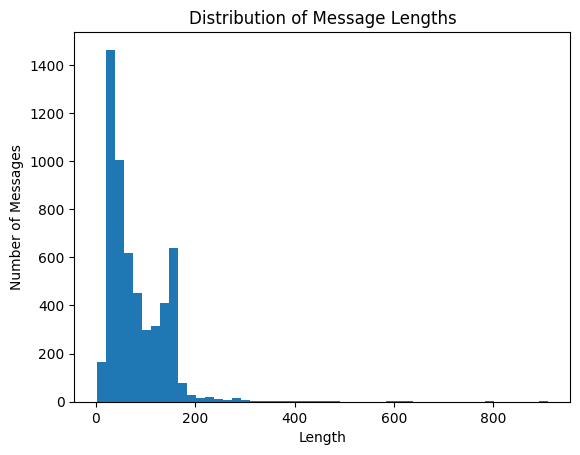

In [8]:
import matplotlib.pyplot as plt

lengths = df.select('length').toPandas()

plt.hist(lengths['length'], bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length')
plt.ylabel('Number of Messages')
plt.show()


In [9]:
label_counts = df.groupBy("v1").count()
label_counts.show()

label_counts2 = df.groupBy("v2").count()
label_counts2.show()

+------+-----+
|    v1|count|
+------+-----+
|ham"""|    2|
|   ham| 4825|
|  spam|  747|
+------+-----+

+--------------------+-----+
|                  v2|count|
+--------------------+-----+
|You are a winner ...|    1|
|Will u meet ur dr...|    1|
|Unless it's a sit...|    1|
|I am great prince...|    1|
|Not a lot has hap...|    1|
|Dont forget you c...|    1|
|How are you with ...|    1|
|Just got some gas...|    1|
|Guess who spent a...|    1|
|K go and sleep we...|    1|
|Hi 07734396839 IB...|    2|
|Lol that's differ...|    1|
|Ola would get bac...|    1|
|Was playng 9 door...|    1|
|Yes I know the ch...|    1|
|And whenever you ...|    1|
|K da:)how many pa...|    1|
|Tunji, how's the ...|    1|
|Wat time do u wan...|    1|
|Your bill at 3 is...|    1|
+--------------------+-----+
only showing top 20 rows



+----+-----+
|word|count|
+----+-----+
|  to|  604|
|   a|  358|
|your|  187|
|  or|  185|
|call|  185|
| the|  178|
|   2|  169|
| for|  169|
| you|  164|
|  is|  143|
|Call|  136|
|  on|  135|
|have|  128|
| and|  119|
|from|  116|
|  ur|  107|
|with|  101|
|   &|   98|
|  of|   93|
|   4|   93|
+----+-----+
only showing top 20 rows



<Figure size 1200x800 with 0 Axes>

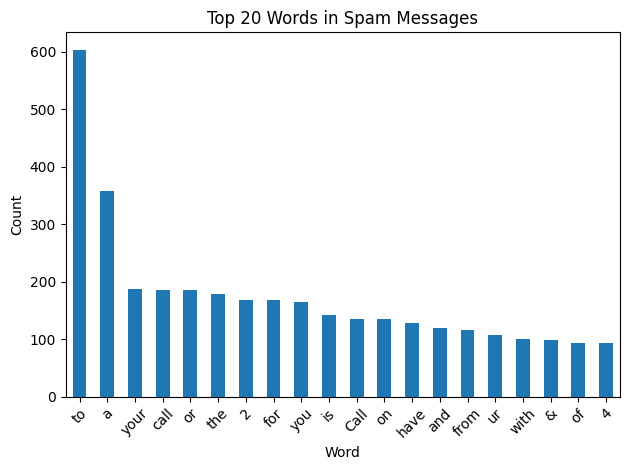

In [10]:
from pyspark.sql.functions import col, explode, split, count, desc
import matplotlib.pyplot as plt

spam_df = df.filter(df['v1'] == 'spam')

spam_words = spam_df.withColumn("word", explode(split(col("v2"), " ")))

word_counts = spam_words.groupBy("word").count()

top_spam_words = word_counts.orderBy(col("count").desc()).limit(20)

top_spam_words_pd = top_spam_words.toPandas()


top_spam_words = word_counts.orderBy(col("count").desc()).show(20)

plt.figure(figsize=(12,8))
top_spam_words_pd.plot(kind='bar', x='word', y='count', legend=None)
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Data Retrieval:

In this section, I am fetching data from a remote source on the web.

- **URL**: The data is located at the provided URL (`data_url`).
- **Local Storage**: After fetching, the data is saved locally as `spam.csv`.

#### Data Loading into Spark:

I load the locally saved data into a Spark DataFrame (`df`).

- **CSV Format**: As the data is in CSV format, I use the `read.csv` method.
- **Headers and Schema**: The data has headers and I want to infer the schema directly from the data.

#### Preliminary Data Exploration:

- **Showing Data**: I display the first few rows of the DataFrame to get an initial understanding of our data.
- **Schema Printing**: This helps me understand the data types and structure of our dataset.
- **Row Count**: By printing the total rows, I get an idea of the dataset's size.
- **Descriptive Statistics**: The `describe` function gives me basic statistics like mean, standard deviation, min, and max for each column.

#### Text Length Analysis:

Analyzing the length of the messages can provide insights into the dataset's nature.

- **Adding Length Column**: A new column (`length`) is added to the DataFrame, representing the length of each message.
- **Min and Max Length**: By finding the minimum and maximum message lengths, I can understand the range of our data.
- **Histogram**: A histogram is plotted to visualize the distribution of message lengths.

#### Label Distribution:

Understanding the distribution of labels (spam or ham) is crucial for a classification problem.

- **Label Counts**: I group by the `v1` column, which seems to represent the label, and count the number of occurrences of each label. This helps understand the data's balance or imbalance.

#### Analyzing Words in Spam Messages:

To get insights into what words are common in spam messages, I conduct a word frequency analysis.

- **Filtering Spam**: I filter out messages that are marked as spam.
- **Word Splitting**: Each message is split into individual words.
- **Word Count**: By grouping on words and counting, I determine the frequency of each word in spam messages.
- **Visualization**: I visualize the top 20 words in spam messages to understand the common themes or words in spam.


### Dataset Schema - Email Spam Detection
- v1:

Type: string

Description: Label indicating if an email is "spam" or "ham" (not spam).

- v2:

Type: string

Description: Main content of the email used for analysis.

- _c2, _c3, _c4:

Type: string

Description: Unclear additional columns; require further investigation.

length:

- Type: integer

Description: Length of the email, potentially indicative of spam characteristics.






# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

In [11]:
count_before = df.count()

df_cleaned= df.dropna(subset=["v1", "v2"])
df_cleaned = df.filter(df["v1"].isNotNull() & (length(df["v2"]) > 0))
df_cleaned = df_cleaned.drop("_c2" , "_c3" , "_c4")

count_after = df_cleaned.count()

print("Number of rows before cleaning:", count_before)
print("Number of rows after cleaning:", count_after)


Number of rows before cleaning: 5574
Number of rows after cleaning: 5573


Rows with null or missing values were removed to ensure the quality and integrity of the dataset. It's essential to have a clean dataset for accurate analysis and modeling. Rows with null values in important columns like 'v1' (label) or 'v2' (message content) don't provide valuable information and can lead to inaccurate insights or skewed model performance. Additionally, rows with empty messages, even if they were not null initially, were removed as they don't contribute meaningful information to the spam classification task.


In [12]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, RegexTokenizer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, lower, regexp_replace

cleaning_udf = lower(regexp_replace(col("v2"), "[^a-zA-Z\\s]", ""))
df_cleaned = df_cleaned.withColumn("clean_text", cleaning_udf)

tokenizer = RegexTokenizer(inputCol="clean_text", outputCol="tokens", pattern="\\s+")

additional_stopwords = ["call", "your", "or", "on", "from", "ur", "with"]
stopwords = StopWordsRemover().getStopWords() + additional_stopwords
remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens", stopWords=stopwords)

pipeline = Pipeline(stages=[tokenizer, remover])

df_preprocessed = pipeline.fit(df_cleaned).transform(df_cleaned)

df_preprocessed.select("clean_text", "tokens", "filtered_tokens").show(5, truncate=False)


+----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------+
|clean_text                                                                                                                  |tokens                                                                                                                                             |filtered_tokens                                                                                                                 |
+----------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------

#### Data Cleaning:

Data cleaning ensures that my analysis is performed on high-quality, relevant data, and removes any unnecessary or corrupted data.

- **Initial Count**: I first count the number of rows before performing any cleaning.
- **Drop Nulls**: I drop rows that have null values in the `v1` and `v2` columns.
- **Filtering**: Further, I filter out rows where `v1` is not null and the length of `v2` is greater than 0.
- **Removing Unwanted Columns**: I drop additional columns (`_c2`, `_c3`, and `_c4`) which seem to be not relevant for my analysis.
- **Final Count**: I count the number of rows after cleaning and display it.


#### Text Cleaning:

Before tokenization and word analysis, I need to ensure the text is in a clean and standard format.

- **Lowercasing & Punctuation Removal**: The `v2` column is transformed such that all characters are in lowercase, and all non-alphabetic characters (punctuation, numbers, etc.) are removed. This is stored in the `clean_text` column.

#### Tokenization and Stopword Removal:

This step is essential for text analysis. Tokenization breaks text into individual words or tokens. Stopword removal ensures common words that add little meaning (e.g., "and", "the") are removed from our analysis.

- **Tokenization**: Using the `RegexTokenizer`, I split the cleaned text (`clean_text`) into individual words or tokens. The resulting tokens are stored in the `tokens` column.
- **Stopword Removal**:
  - I first define a set of additional stopwords that are specific to my dataset.
  - I then combine these additional stopwords with the default list of stopwords provided by PySpark.
  - Using the `StopWordsRemover`, I remove these stopwords from our tokens. The resulting tokens, after stopword removal, are stored in the `filtered_tokens` column.

#### Pipeline Implementation:

Using PySpark's `Pipeline`, I create a sequence of data processing stages. This ensures my data goes through each stage in the specified order, making our code more organized and efficient.

- **Pipeline Creation**: I specify the stages of our pipeline, which are tokenization and stopword removal.
- **Data Transformation**: I fit my pipeline to the cleaned data and transform it. The resulting DataFrame, `df_preprocessed`, has undergone both tokenization and stopword removal.
- **Display**: Finally, I display the `clean_text`, `tokens`, and `filtered_tokens` columns of our preprocessed DataFrame.


# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

In [13]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, StringIndexer, Word2Vec, VectorAssembler
from pyspark.ml import Pipeline

def compute_length(text):
    return len(text)

length_udf = udf(compute_length, IntegerType())

df_cleaned = df_cleaned.withColumn("length", length_udf(col("v2")))

word2Vec = Word2Vec(vectorSize=150, minCount=3, inputCol="filtered_tokens", outputCol="features")

label_indexer = StringIndexer(inputCol="v1", outputCol="label")

pipeline = Pipeline(stages=[tokenizer, remover, word2Vec, label_indexer])

model = pipeline.fit(df_cleaned)
df_preprocessed = model.transform(df_cleaned)

assembler = VectorAssembler(inputCols=["features", "length"], outputCol="final_features")
df_preprocessed = assembler.transform(df_preprocessed)

train_df, test_df = df_preprocessed.randomSplit([0.8, 0.2], seed=42)

df_preprocessed.select(["final_features", "label"]).show(truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**1. Text Length Computation:**

I define a function compute_length that computes the length of the given text. This function is then converted into a User-Defined Function (UDF) named length_udf.

**2. Adding Text Length as a New Column:**

I add a new column to df_cleaned named length, which contains the length of the text present in the v2 column.

**3. Word Embeddings with Word2Vec:**

I instantiate a Word2Vec model with specified hyperparameters. The goal is to transform the tokenized text into dense vector representations that capture semantic information.

**4. Label Indexing:**

Using StringIndexer, I convert the categorical labels in the v1 column into numerical indices. This step is essential for most machine learning algorithms that expect numerical labels.

**5. Building the Data Processing Pipeline:**

I create a pipeline that chains various transformations in a specific order. The stages include tokenization, stopword removal, Word2Vec transformation, and label indexing.

**6. Transforming the Data:**

After fitting the pipeline to df_cleaned, I transform the dataframe. The result, df_preprocessed, contains tokenized, cleaned, and vectorized text along with indexed labels.

**7. Combining Features into a Single Column:**

I use VectorAssembler to combine the word embeddings and the text length into a single feature vector named final_features.

**8. Splitting the Data:**

I split the preprocessed dataframe into training and testing sets using an 80-20 split ratio, ensuring a random distribution by setting a seed value of 42.

**9. Displaying the Processed Data:**

Finally, I display the final_features and label columns of the df_preprocessed dataframe.


# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [14]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features", labelCol="label")

lr_model = lr.fit(train_df)
predictions = lr_model.transform(test_df)


In [15]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_auc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

auc = evaluator_auc.evaluate(predictions)
accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)

print("AUC:", auc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


AUC: 0.9538666510497551
Accuracy: 0.9477124183006536
Precision: 0.9458388781458147
Recall: 0.9477124183006536
F1-Score: 0.9460981528234265


In [16]:
from pyspark.sql import SparkSession

predictions.createOrReplaceTempView("predictions_view")

spam_messages = spark.sql("SELECT * FROM predictions_view WHERE prediction = 1")

spam_messages.show()

def recommend_message_type(prediction):
    return "Recommended for Review" if prediction == 1 else "Safe to Read"

from pyspark.sql.types import StringType

recommend_udf = udf(recommend_message_type, StringType())
recommendations = predictions.withColumn("Recommendation", recommend_udf(predictions["prediction"]))

recommendations.select("v2", "Recommendation").show()


+----+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+----------+
|  v1|                  v2|length|          clean_text|              tokens|     filtered_tokens|            features|label|      final_features|       rawPrediction|         probability|prediction|
+----+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+----------+
| ham|3 pa but not sele...|    22| pa but not selected|[pa, but, not, se...|      [pa, selected]|[-0.0015220423229...|  0.0|[-0.0015220423229...|[2.43861196733237...|[0.17295440974874...|       1.0|
| ham|Call me. I m unab...|    55|call me i m unabl...|[call, me, i, m, ...|[m, unable, cal, ...|[0.00292864757856...|  0.0|[0.00292864757856...|[2.42199095342086...|[0.18630918820978...|       1.0|
| ham

In [17]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

rf = RandomForestClassifier(featuresCol="final_features", labelCol="label", numTrees=100)
rf_model = rf.fit(train_df)

predictions = rf_model.transform(test_df)

evaluator_auc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)

evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)

print("AUC:", auc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

prediction_and_label = predictions.select("prediction", "label").rdd
metrics = MulticlassMetrics(prediction_and_label)
confusion_matrix = metrics.confusionMatrix().toArray()
print("Confusion Matrix:")
print(confusion_matrix)


AUC: 0.9456018857427362
Accuracy: 0.942110177404295
Precision: 0.9429578519997326
Recall: 0.942110177404295
F1-Score: 0.9364740403918563
Confusion Matrix:
[[919.   4.]
 [ 58.  90.]]


**1. Logistic Regression Model Implementation:**

Using PySpark's LogisticRegression class, I attempt to model the relationship between our features and the target label. This is done to predict the probability of a particular class.

**Model Initialization:** Define the columns for features and label for our Logistic Regression model.

**Training:** The model, lr, is then trained using the training dataset, producing lr_model.

**Prediction:** The trained model is applied to the test dataset to produce predictions.


**2. Evaluating the Model's Performance:**

Once predictions are made, it's crucial to assess the model's effectiveness using various metrics.

**Evaluators Initialization:** Multiple evaluators are initialized, one for each of the metrics I want: AUC, accuracy, precision, recall, and F1-Score.

**Metric Calculation:**For each evaluator, I apply it to the model's predictions to compute the respective metric.

**Output:** The calculated metrics are printed, offering insights into the model's performance.


**3. Deep Dive into Predictions:**

Analyzing specific predictions, especially misclassifications, can provide valuable insights.

**SQL View Creation:** By creating an SQL view of our predictions, I can run SQL-like queries on my dataset.

**Spam Filtering:** I extract messages predicted as spam and display them.

**Recommendation Generation:**Based on the prediction (spam or not), I tag messages with recommendations using a user-defined function. The aim is to guide user actions based on model predictions.


**4. Exploring Random Forest Classifier:**

To enhance the robustness of my solution, I employ another model – the Random Forest Classifier.

**Model Initialization:**The Random Forest model is defined, specifying my feature columns and label.

**Training and Prediction:** Similar to the Logistic Regression model, I train the Random Forest model on the training data and make predictions on the test data.

**Performance Evaluation:** Using the same evaluators, I compute and print performance metrics for this model, enabling a comparison with my previous model.

**5. Detailed Model Analysis using Confusion Matrix:**
The confusion matrix offers a comprehensive view of where my model is accurate and where it errs.

**Matrix Generation:** Predictions are reformatted to a structure suitable for generating a confusion matrix.

**Output:** The matrix, which shows True Positives, True Negatives, False Positives, and False Negatives, is displayed. This aids in understanding the model's precise performance nuances.






Both the Logistic Regression and Random Forest classifiers have performed commendably in classifying text messages. The Logistic Regression model slightly outperforms the Random Forest Classifier in this dataset, as indicated by the AUC and F1-Score. However, there is room for improvement, especially in reducing false negatives (misclassified 'spam' messages), which could be critical in a real-world spam detection scenario.